In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split





In [5]:
########### load the data

data = pd.read_csv('iris.csv')

x_data = data.iloc[:,1:5].values
y = data.iloc[:,5].values

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


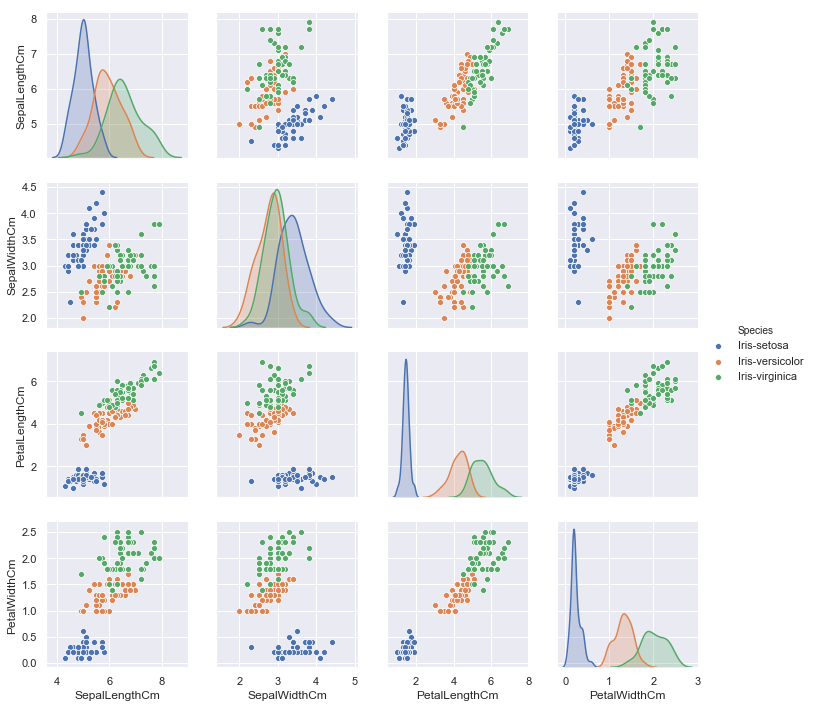

In [6]:
######## visualization data
sns.set()

sns.pairplot(data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']],
             hue='Species',diag_kind='kde')


C:\Users\brak2\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


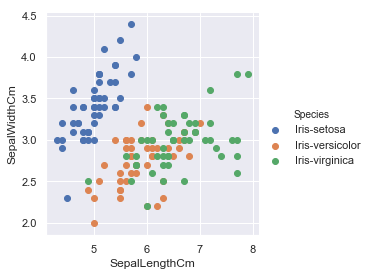

In [7]:
##########visualization

sns.FacetGrid(data,hue='Species',size=4)\
.map(plt.scatter,'SepalLengthCm','SepalWidthCm')\
.add_legend()


In [29]:
# we have to obtain y_train data as 0 and 1 . So after that we can use the data for train and test
encod = LabelEncoder()

y_ = encod.fit_transform(y)
y_data = pd.get_dummies(y_)

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,
                                                 random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(120, 4)
(120, 3)
(30, 4)
(30, 3)


In [65]:
# initialize the weights and bise parameters
def initialize(feature):
    weights = np.full((feature,3),0.01,dtype=np.float)
    biase = np.full((1,1),0.01,dtype=np.float)
    return weights,biase



# create the softmax function
def softmax(z):
    exp = np.exp(z)
    prob  = exp/np.sum(exp ,axis=1, keepdims=True)
    return prob


# create the cross_entropy function
def cross_entropy(prob):
    long = y_train.shape[0]
    for i in range(long):
        log_prob = -np.log(prob[i,y_train])
        cost = sum(log_prob)/long
    return cost


# we can obtain linear regression by use the forward propagation function
def forward(weights,biase,x_train,y_train):

    linear = np.dot(x_train,weights) + biase
    A1 = softmax(linear)
    loss = cross_entropy(A1)

    frw = {'A1':A1,'loss':loss,'linear':linear}
    return frw


# calculate the derivative weigts and biase by use back propagation function
def backward(weights,biase,x_train,y_train):

    frw = forward(weights,biase,x_train,y_train)
    A1 = frw['A1']
    loss = frw['loss']

    deriwative = A1

    for i in range(y_train.shape[0]):
        deriwative[i,y_train] -= 1

    deriwative = deriwative/y_train.shape[0]

    derivative_weight = np.dot(x_train.T,deriwative)
    derivative_biase = np.sum(deriwative)/x_train.shape[0]
    reg = (1e-3) # regularization
    cost = reg*(0*5)*np.sum(weights*weights)
    cost = loss+cost


    derivative_weight += weights*reg
    gradient = {'derivative_weight': derivative_weight,'derivative_biase':derivative_biase}

    return cost,gradient




# update the weigts and biase
def update(weights,biase,x_train,y_train,lr,epoch):

     cost_list1 = []
     cost_list2 = []
     index = []


     for i in range(epoch):
         cost,gradient = backward(weights,biase,x_train,y_train)
         cost_list1.append(cost)
         weights = weights - (lr*gradient['derivative_weight'])
         biase = biase - (lr*gradient['derivative_biase'])
         if i % 10 == 0:
             cost_list2.append(cost)
             index.append(i)
             print ("Cost after iteration %i: %f" %(i, cost[0]))

     last_params = {'weights':weights,'biase':biase}
     linear_class = {'weights': weights,'biase':biase}
     plt.plot(index,cost_list2)
     plt.xlabel('epochs')
     plt.ylabel('cost')
     plt.show()

     return linear_class,cost_list1,gradient,last_params

def prediction(weights,biase,x_test):

    linear = np.dot(x_test,weights)+biase
    z = softmax(linear)
    predict = np.zeros((x_test.shape[0],1))
    for i in range(z.shape[0]):
        if z[i,0] <=0.5:
            predict[i,0] = 0
        else:
            predict[i,0] = 1

    return  predict

# train tha data
def train_test(x_train,y_train,x_test,y_test,lr,epoch):

    weights,biase = initialize(feature=4)
    linear_class,cost_list1,gradient,parameters = update(weights,biase,x_train,y_train,lr,epoch)
    predict_test = prediction(parameters['weights'],parameters['biase'],x_test)
    predict_train = prediction(parameters['weights'],parameters['biase'],x_train)

    print('\n','test accuracy:{} %'.format(100-np.mean(np.abs(predict_test - y_test))*100),'\n')
    print('train accuracy:{} %'.format(100-np.mean(np.abs(predict_train - y_train))*100),'\n')










Cost after iteration 0: 1.098612
Cost after iteration 10: 0.696928
Cost after iteration 20: 0.693232
Cost after iteration 30: 0.693149
Cost after iteration 40: 0.693147
Cost after iteration 50: 0.693147
Cost after iteration 60: 0.693147
Cost after iteration 70: 0.693147
Cost after iteration 80: 0.693147
Cost after iteration 90: 0.693147
Cost after iteration 100: 0.693147
Cost after iteration 110: 0.693147

 test accuracy:0    66.666667
1    70.000000
2    63.333333
dtype: float64 % 

train accuracy:0    66.666667
1    65.833333
2    67.500000
dtype: float64 % 



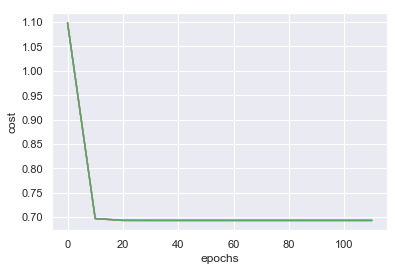

In [66]:
train_test(x_train,y_train,x_test,y_test,lr=0.01,epoch=120)
